In [ ]:
# Import Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 2013-2014 data

Hepatitis1 = pd.read_sas("2013-2014 data\HEQ_H.XPT")
AlcoholUse1 = pd.read_sas("2013-2014 data\ALQ_H.XPT")
CurrentHealthStatus1 = pd.read_sas("2013-2014 data\HSQ_H.XPT")
Immunization1 = pd.read_sas("2013-2014 data\IMQ_H.XPT")
MedicalConditions1 = pd.read_sas("2013-2014 data\MCQ_H.XPT")
SmokingCigaretteUse1 = pd.read_sas("2013-2014 data\SMQ_H.XPT")
BloodPressure1 = pd.read_sas("2013-2014 data\BPX_H.XPT")
BodyMeasures1 = pd.read_sas("2013-2014 data\BMX_H.XPT")
HepatitisBcore1 = pd.read_sas("2013-2014 data\HEPBD_H.XPT")
HepatitisBsurface1 = pd.read_sas("2013-2014 data\HEPB_S_H.XPT")
HepatitisC1 = pd.read_sas("2013-2014 data\HEPC_H.XPT")

In [ ]:
from functools import reduce
data_merge1 = reduce(lambda left, right:     # Merge three pandas DataFrames
                     pd.merge(left , right,
                              on = ["SEQN"]),
                     [AlcoholUse1, CurrentHealthStatus1,  Hepatitis1,Immunization1,MedicalConditions1,SmokingCigaretteUse1,
                     BloodPressure1, BodyMeasures1, HepatitisBcore1, HepatitisBsurface1, HepatitisC1])
data_merge1

In [ ]:
# 2015-2016 data

Hepatitis2 = pd.read_sas("2015-2016 data\HEQ_I.XPT")
AlcoholUse2 = pd.read_sas("2015-2016 data\ALQ_I.XPT")
CurrentHealthStatus2 = pd.read_sas("2015-2016 data\HSQ_I.XPT")
Immunization2 = pd.read_sas("2015-2016 data\IMQ_I.XPT")
MedicalConditions2 = pd.read_sas("2015-2016 data\MCQ_I.XPT")
SmokingCigaretteUse2 = pd.read_sas("2015-2016 data\SMQ_I.XPT")
BloodPressure2 = pd.read_sas("2015-2016 data\BPX_I.XPT")
BodyMeasures2 = pd.read_sas("2015-2016 data\BMX_I.XPT")
HepatitisBcore2 = pd.read_sas("2015-2016 data\HEPBD_I.XPT")
HepatitisBsurface2 = pd.read_sas("2015-2016 data\HEPB_S_I.XPT")
HepatitisC2 = pd.read_sas("2015-2016 data\HEPC_I.XPT")

In [ ]:
from functools import reduce
data_merge2 = reduce(lambda left, right:     # Merge three pandas DataFrames
                     pd.merge(left , right,
                              on = ["SEQN"]),
                     [AlcoholUse2, CurrentHealthStatus2,  Hepatitis2,Immunization2,MedicalConditions2,SmokingCigaretteUse2,
                     BloodPressure2, BodyMeasures2, HepatitisBcore2, HepatitisBsurface2, HepatitisC2])
data_merge2

In [ ]:
# Find columns that are similar across all year periods

similar_columns = sorted(list(set(data_merge1.columns).intersection(set(data_merge2.columns))))

In [ ]:
# Use columns similar across all year periods

data_20132014 = data_merge1[similar_columns]
data_20132014.insert(0, 'SEQN', data_20132014.pop('SEQN'))

data_20152016 = data_merge2[similar_columns]
data_20152016.insert(0, 'SEQN', data_20152016.pop('SEQN'))

In [ ]:
# Concatenate the datasets

data_total = pd.concat([data_20132014, data_20152016])

data_total

In [ ]:
# HEQ010 1.0 or HEQ030 1.0 (has hepatitis) new column

data_total['HEQ'] = np.where(((data_total.HEQ010 == 1.0) | ((data_total.HEQ030 == 1.0))), 1.0, 2.0)

data_total['HEQ'].value_counts()

In [ ]:
# HEQ020 1.0 or HEQ040 1.0 (took meds for hepatitis) new column

data_total['MEDS'] = np.where(((data_total.HEQ020 == 1.0) | ((data_total.HEQ040 == 1.0))), 1.0, 2.0)

data_total['MEDS'].value_counts()

In [ ]:
# Drop HEQ columns as we have combined them

data_total = data_total.drop(['HEQ010', 'HEQ020', 'HEQ030', 'HEQ040'], axis = 1)

In [ ]:
data_total

In [ ]:
# Missing values

percentage_missing = data_total.isnull().mean() * 100
percentage_missing = percentage_missing[percentage_missing != 0].sort_values(ascending = False)

number_missing = data_total.isnull().sum()
number_missing = number_missing[number_missing != 0].sort_values(ascending = False)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(percentage_missing)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(number_missing)

In [ ]:
# EDA

hasHephasLiverCondition = len(
    data_total.loc[(data_total['HEQ'] == 1.0) & (data_total['MCQ160L'] == 1.0)]) / len(data_total.loc[(data_total['HEQ'] == 1.0)]
    ) * 100
hasHephasNoLiverCondition = len(
    data_total.loc[(data_total['HEQ'] == 1.0) & (data_total['MCQ160L'] != 1.0)]) / len(data_total.loc[(data_total['HEQ'] == 1.0)]
    ) * 100

hasNoHephasLiverCondition = len(
    data_total.loc[(data_total['HEQ'] == 2.0) & (data_total['MCQ160L'] == 1.0)]) / len(data_total.loc[(data_total['HEQ'] == 2.0)]
    ) * 100
hasNoHephasNoLiverCondition = len(
    data_total.loc[(data_total['HEQ'] == 2.0) & (data_total['MCQ160L'] != 1.0)]) / len(data_total.loc[(data_total['HEQ'] == 2.0)]
    ) * 100

hepatitis_liver_data = {
    'Has hepatitis': [hasHephasLiverCondition, hasHephasNoLiverCondition, hasHephasLiverCondition + hasHephasNoLiverCondition],
    'Does not have hepatitis': [hasNoHephasLiverCondition, hasNoHephasNoLiverCondition, hasNoHephasLiverCondition + hasNoHephasNoLiverCondition]
}

hepatitis_liver_table = pd.DataFrame(data = hepatitis_liver_data)
hepatitis_liver_table.index = ['Has liver condition', 'Does not have liver condition', 'Total']
hepatitis_liver_table

In [ ]:
# EDA

plt.bar([1, 2], [hasHephasLiverCondition, hasNoHephasLiverCondition])
plt.bar([1, 2], [hasHephasNoLiverCondition, hasNoHephasNoLiverCondition], bottom = [hasHephasLiverCondition, hasNoHephasLiverCondition])
plt.xticks([1, 2], ['Has hepatitis', 'Does not have hepatitis'])
plt.legend(['Has liver condition', 'Does not have liver condition'], bbox_to_anchor = (0.5, 1.25))
plt.xlabel("Hepatitis Status")
plt.ylabel("Percentage of People with/without Liver Condition")
plt.title("Stacked Barplot of Hepatitis against Liver Condition")
plt.show()

<ipython-input-28-5fe771337a18>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

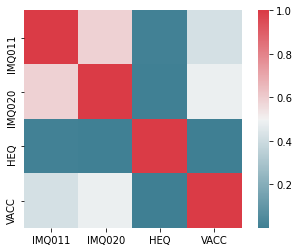

In [28]:
# EDA Tom- link between vaccines and infection

vacc_df = data_total[['IMQ011','IMQ020','HEQ']].copy()

vacc_df["VACC"] = np.where(((vacc_df.IMQ011 < 3.0) | (vacc_df.IMQ020 < 3.0)), 1, 2)

corr_matrix = vacc_df.corr(method='pearson')
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)